# Tutorial Step 5: GWOSC API Examples

This tutorial will present some python packages that allows programmatic access to the data on the [GWOSC web site](https://gwosc.org/).

## The `gwosc` package

We start with the [`gwosc`](https://git.ligo.org/gwosc/client) python package which provides a simple API to the [GWOSC web site](https://gwosc.org/).
This package allows to:

  - query datasets
  - query file URLs
  - query timeline segments
  
More information can be found in the [package documentation](https://gwosc.readthedocs.io/en/stable/).

### Installation

The best way to install `gwosc` depends on your environment.
Please read [the installation instructions](https://gwosc.readthedocs.io/en/stable/#installation).

In [1]:
# If you use IGWN conda distribution or if you use this notebook through My Binder, the `gwosc` package should already be installed.
# Uncomment the following line if running in Google Colab or in you own virtualenv.
#! pip install -q 'gwosc==0.7.1'

In [2]:
#check the version of the package gwosc you are using
import gwosc
print(gwosc.__version__)

0.7.1


### Basic usage

In this example, we are going to download the same file than in [Step 1 of this tutorial](<./01 - Download GWOSC Data.ipynb>).

In [3]:
from gwosc.locate import get_urls

start = 1264312320
end   = start + 4095

urls  = get_urls('H1', start, end)

In [4]:
import requests


def download_strain_file(download_url):
    "Download the strain file on the given url and save to disk."
    # In the next line I parse the file name from the download url.
    # Ideally, the file name should be grabbed from the
    # Content-Disposition response header.
    filename = download_url.split("/")[-1]
    with requests.get(download_url, stream=True) as r:
        r.raise_for_status()
        with open(filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return filename

download_strain_file(urls[0])

'H-H1_GWOSC_O3b_4KHZ_R1-1264312320-4096.hdf5'

### More advanced usage

TODO

## The `gwpy` package

[`gwpy`](https://gwpy.github.io/) is a python package that provides a user-friendly, intuitive interface to the common time-domain and frequency-domain data.
It is based on the `gwosc` package but contains much more functionality.
Here, we will only focus on reading data from the [GWOSC web site](https://gwosc.org/).
More information can be found in the [package documentation](https://gwpy.github.io/docs/).

### Installation

The best way to install `gwpy` depends on your environment.
Please read [the installation instructions](https://gwpy.github.io/docs/stable/install/).

In [5]:
# If you use IGWN conda distribution or if you use this notebook through My Binder, the `gwpy` package should already be installed.
# Uncomment the following line if running in Google Colab or in you own virtualenv.
#! pip install -q 'gwpy==3.0.8'

In [6]:
import gwpy
print(gwpy.__version__)

/Users/mdubois/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


3.0.8


### Basic usage

`gwpy` can be used to download a chunk of data around a GPS time.

In [7]:
from gwpy.timeseries import TimeSeries


# Note that we download only 15s of data
data = TimeSeries.fetch_open_data('L1', start, start + 15)

The `TimeSeries` object can be plotted directly:

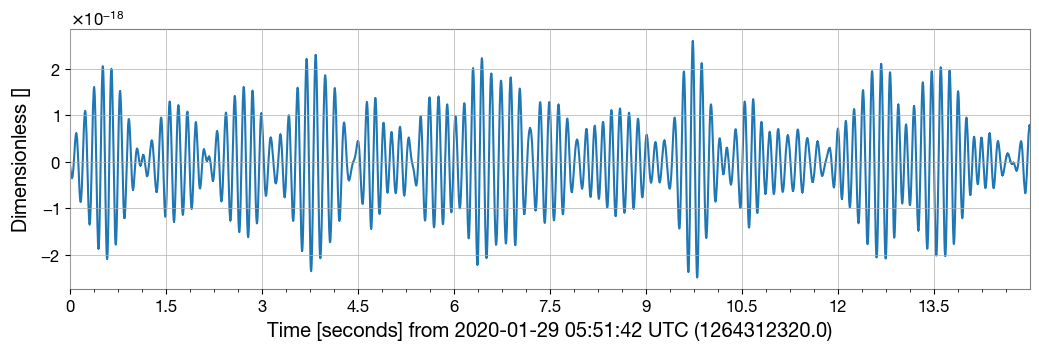

In [8]:
figure = data.plot()

### More advanced usage

TODO

## What's next?

TODO